## Analysis of spatial factors shared among slices and their gene signatures

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import get_cmap

import warnings
warnings.filterwarnings("ignore")

### Load results

In [2]:
res_path = "Results/INSPIRE_brain_different_views"
adata = sc.read_h5ad(res_path + "/adata_inspire.h5ad")
basis_df = pd.read_csv(res_path + "/basis_df_inspire.csv", index_col=0)

### Spatial distributions of spatial factors that are shared across slices

In [3]:
# load raw data with histological images
data_dir = "data/Visium_mouse_brain/Visium_sagittal-anterior2"
adata_st1 = sc.read_visium(path=data_dir,
                           count_file="V1_Mouse_Brain_Sagittal_Anterior_Section_2_filtered_feature_bc_matrix.h5")
adata_st1.var_names_make_unique()
adata_st1.obs.index = adata_st1.obs.index + "-0"

data_dir = "data/Visium_mouse_brain/Visium_sagittal-posterior2"
adata_st2 = sc.read_visium(path=data_dir,
                           count_file="V1_Mouse_Brain_Sagittal_Posterior_Section_2_filtered_feature_bc_matrix.h5")
adata_st2.var_names_make_unique()
adata_st2.obs.index = adata_st2.obs.index + "-1"

data_dir = "data/Visium_mouse_brain/Visium_coronal"
adata_st3 = sc.read_visium(path=data_dir,
                           count_file="V1_Adult_Mouse_Brain_filtered_feature_bc_matrix.h5")
adata_st3.var_names_make_unique()
adata_st3.obs.index = adata_st3.obs.index + "-2"

slice1_idx = "V1_Mouse_Brain_Sagittal_Anterior_Section_2"
slice2_idx = "V1_Mouse_Brain_Sagittal_Posterior_Section_2"
slice3_idx = "V1_Adult_Mouse_Brain"

In [4]:
for spatial_factor_index in [1,19,39]:
    adata_st1.obs["proportion-"+str(spatial_factor_index)] = adata[adata_st1.obs.index, :].obs["Proportion of spatial factor "+str(spatial_factor_index)].values
    adata_st2.obs["proportion-"+str(spatial_factor_index)] = adata[adata_st2.obs.index, :].obs["Proportion of spatial factor "+str(spatial_factor_index)].values
    adata_st3.obs["proportion-"+str(spatial_factor_index)] = adata[adata_st3.obs.index, :].obs["Proportion of spatial factor "+str(spatial_factor_index)].values

In [5]:
# adjust spatial locations of the three slices
ymax_1 = np.max(adata_st1.obsm["spatial"][:,1])
ymax_2 = np.max(adata_st2.obsm["spatial"][:,1])
ymax_3 = np.max(adata_st3.obsm["spatial"][:,1])

y_adjust_2to1 = ymax_1 - ymax_2
y_adjust_3to1 = ymax_1 - ymax_3

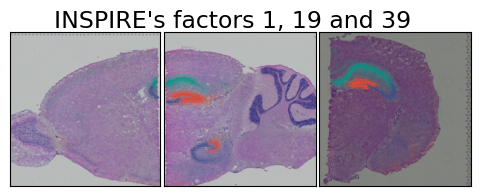

In [6]:
factor_list = ["1","19","39"]
color_list = ["#3C5488FF","#E64B35FF","#00A087FF"]

fig = plt.figure(figsize=(6,2))
size = 1.


# slice 1
ax0 = fig.add_subplot(1, 3, 1)
ax0.imshow(adata_st1.uns["spatial"][str(slice1_idx)]['images']['lowres'])
ax0.set_aspect('equal')
x_coor = adata_st1.obsm["spatial"][:, 0] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st1.obsm["spatial"][:, 1] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
for i in range(len(factor_list)):
    ax0.scatter(x_coor, y_coor, s=size, rasterized=True, c=color_list[i], alpha=adata_st1.obs["proportion-"+factor_list[i]])
xmin, xmax = np.min(x_coor)-0, np.max(x_coor)+0
ymin, ymax = np.min(y_coor)-50, np.max(y_coor)
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymax, ymin)
ax0.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)


# slice 2
ax1 = fig.add_subplot(1, 3, 2)
ax1.imshow(adata_st2.uns["spatial"][str(slice2_idx)]['images']['lowres'])
ax1.set_aspect('equal')
x_coor = adata_st2.obsm["spatial"][:, 0] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st2.obsm["spatial"][:, 1] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
for i in range(len(factor_list)):
    ax1.scatter(x_coor, y_coor, s=size, rasterized=True, c=color_list[i], alpha=adata_st2.obs["proportion-"+factor_list[i]])
xmin, xmax = np.min(x_coor)-0, np.max(x_coor)+0
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymax - y_adjust_2to1 * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef'], 
             ymin - y_adjust_2to1 * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef'])
ax1.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)


# slice 3
ax2 = fig.add_subplot(1, 3, 3)
ax2.imshow(adata_st3.uns["spatial"][str(slice3_idx)]['images']['lowres'])
x_coor = adata_st3.obsm["spatial"][:, 0] * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st3.obsm["spatial"][:, 1] * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef']
for i in range(len(factor_list)):
    ax2.scatter(x_coor, y_coor, s=size, rasterized=True, c=color_list[i], alpha=adata_st3.obs["proportion-"+factor_list[i]])
ax2.set_aspect('equal')
ax2.set_xlim(xmin-0, xmax-0)
ax2.set_ylim(ymax - y_adjust_3to1 * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef'], 
             ymin - y_adjust_3to1 * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef'])
ax2.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)


fig.suptitle("INSPIRE's factors 1, 19 and 39", fontsize=17, y=.99)
fig.subplots_adjust(hspace=0.0, wspace=0.0)
plt.show()

### Detect top genes related to these spatial factors in hippocampus using gene loadings

In [7]:
factor_id = 0

factor_profile = np.array(basis_df.iloc[factor_id,:].values)
order = np.argsort(-factor_profile)

potential_marker = list(basis_df.columns[order[:50]])
marker_ours = []
for i in range(len(potential_marker)):
    id_1 = np.argsort(-basis_df[potential_marker[i]])[0]
    id_2 = np.argsort(-basis_df[potential_marker[i]])[1]
    val_1 = basis_df[potential_marker[i]][id_1]
    val_2 = basis_df[potential_marker[i]][id_2]
    if (id_1 == factor_id) & (val_1 >= (val_2*1.5)):
        marker_ours.append(potential_marker[i])

marker_ours_0 = marker_ours

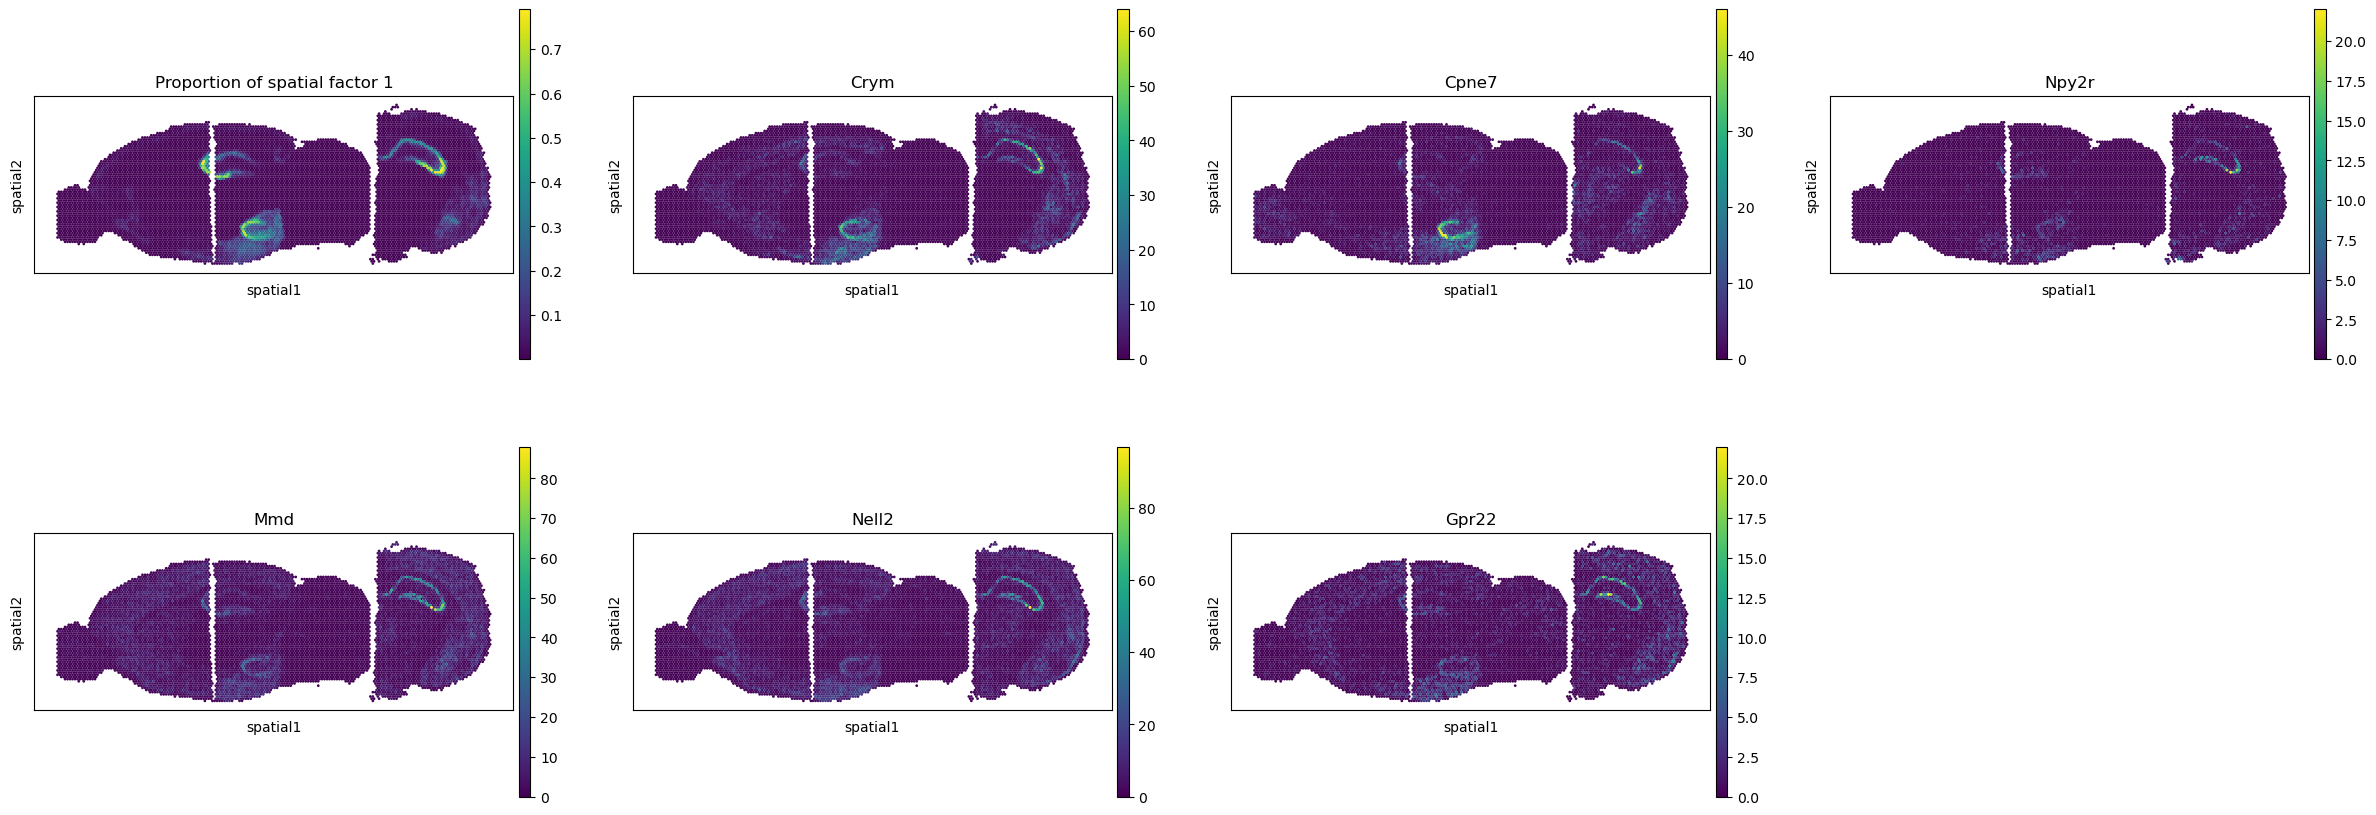

In [8]:
sc.pl.spatial(adata, color=["Proportion of spatial factor 1"] + marker_ours_0, spot_size=150.)

In [9]:
factor_id = 18

factor_profile = np.array(basis_df.iloc[factor_id,:].values)
order = np.argsort(-factor_profile)

potential_marker = list(basis_df.columns[order[:50]])
marker_ours = []
for i in range(len(potential_marker)):
    id_1 = np.argsort(-basis_df[potential_marker[i]])[0]
    id_2 = np.argsort(-basis_df[potential_marker[i]])[1]
    val_1 = basis_df[potential_marker[i]][id_1]
    val_2 = basis_df[potential_marker[i]][id_2]
    if (id_1 == factor_id) & (val_1 >= (val_2*1.5)):
        marker_ours.append(potential_marker[i])

marker_ours_18 = marker_ours

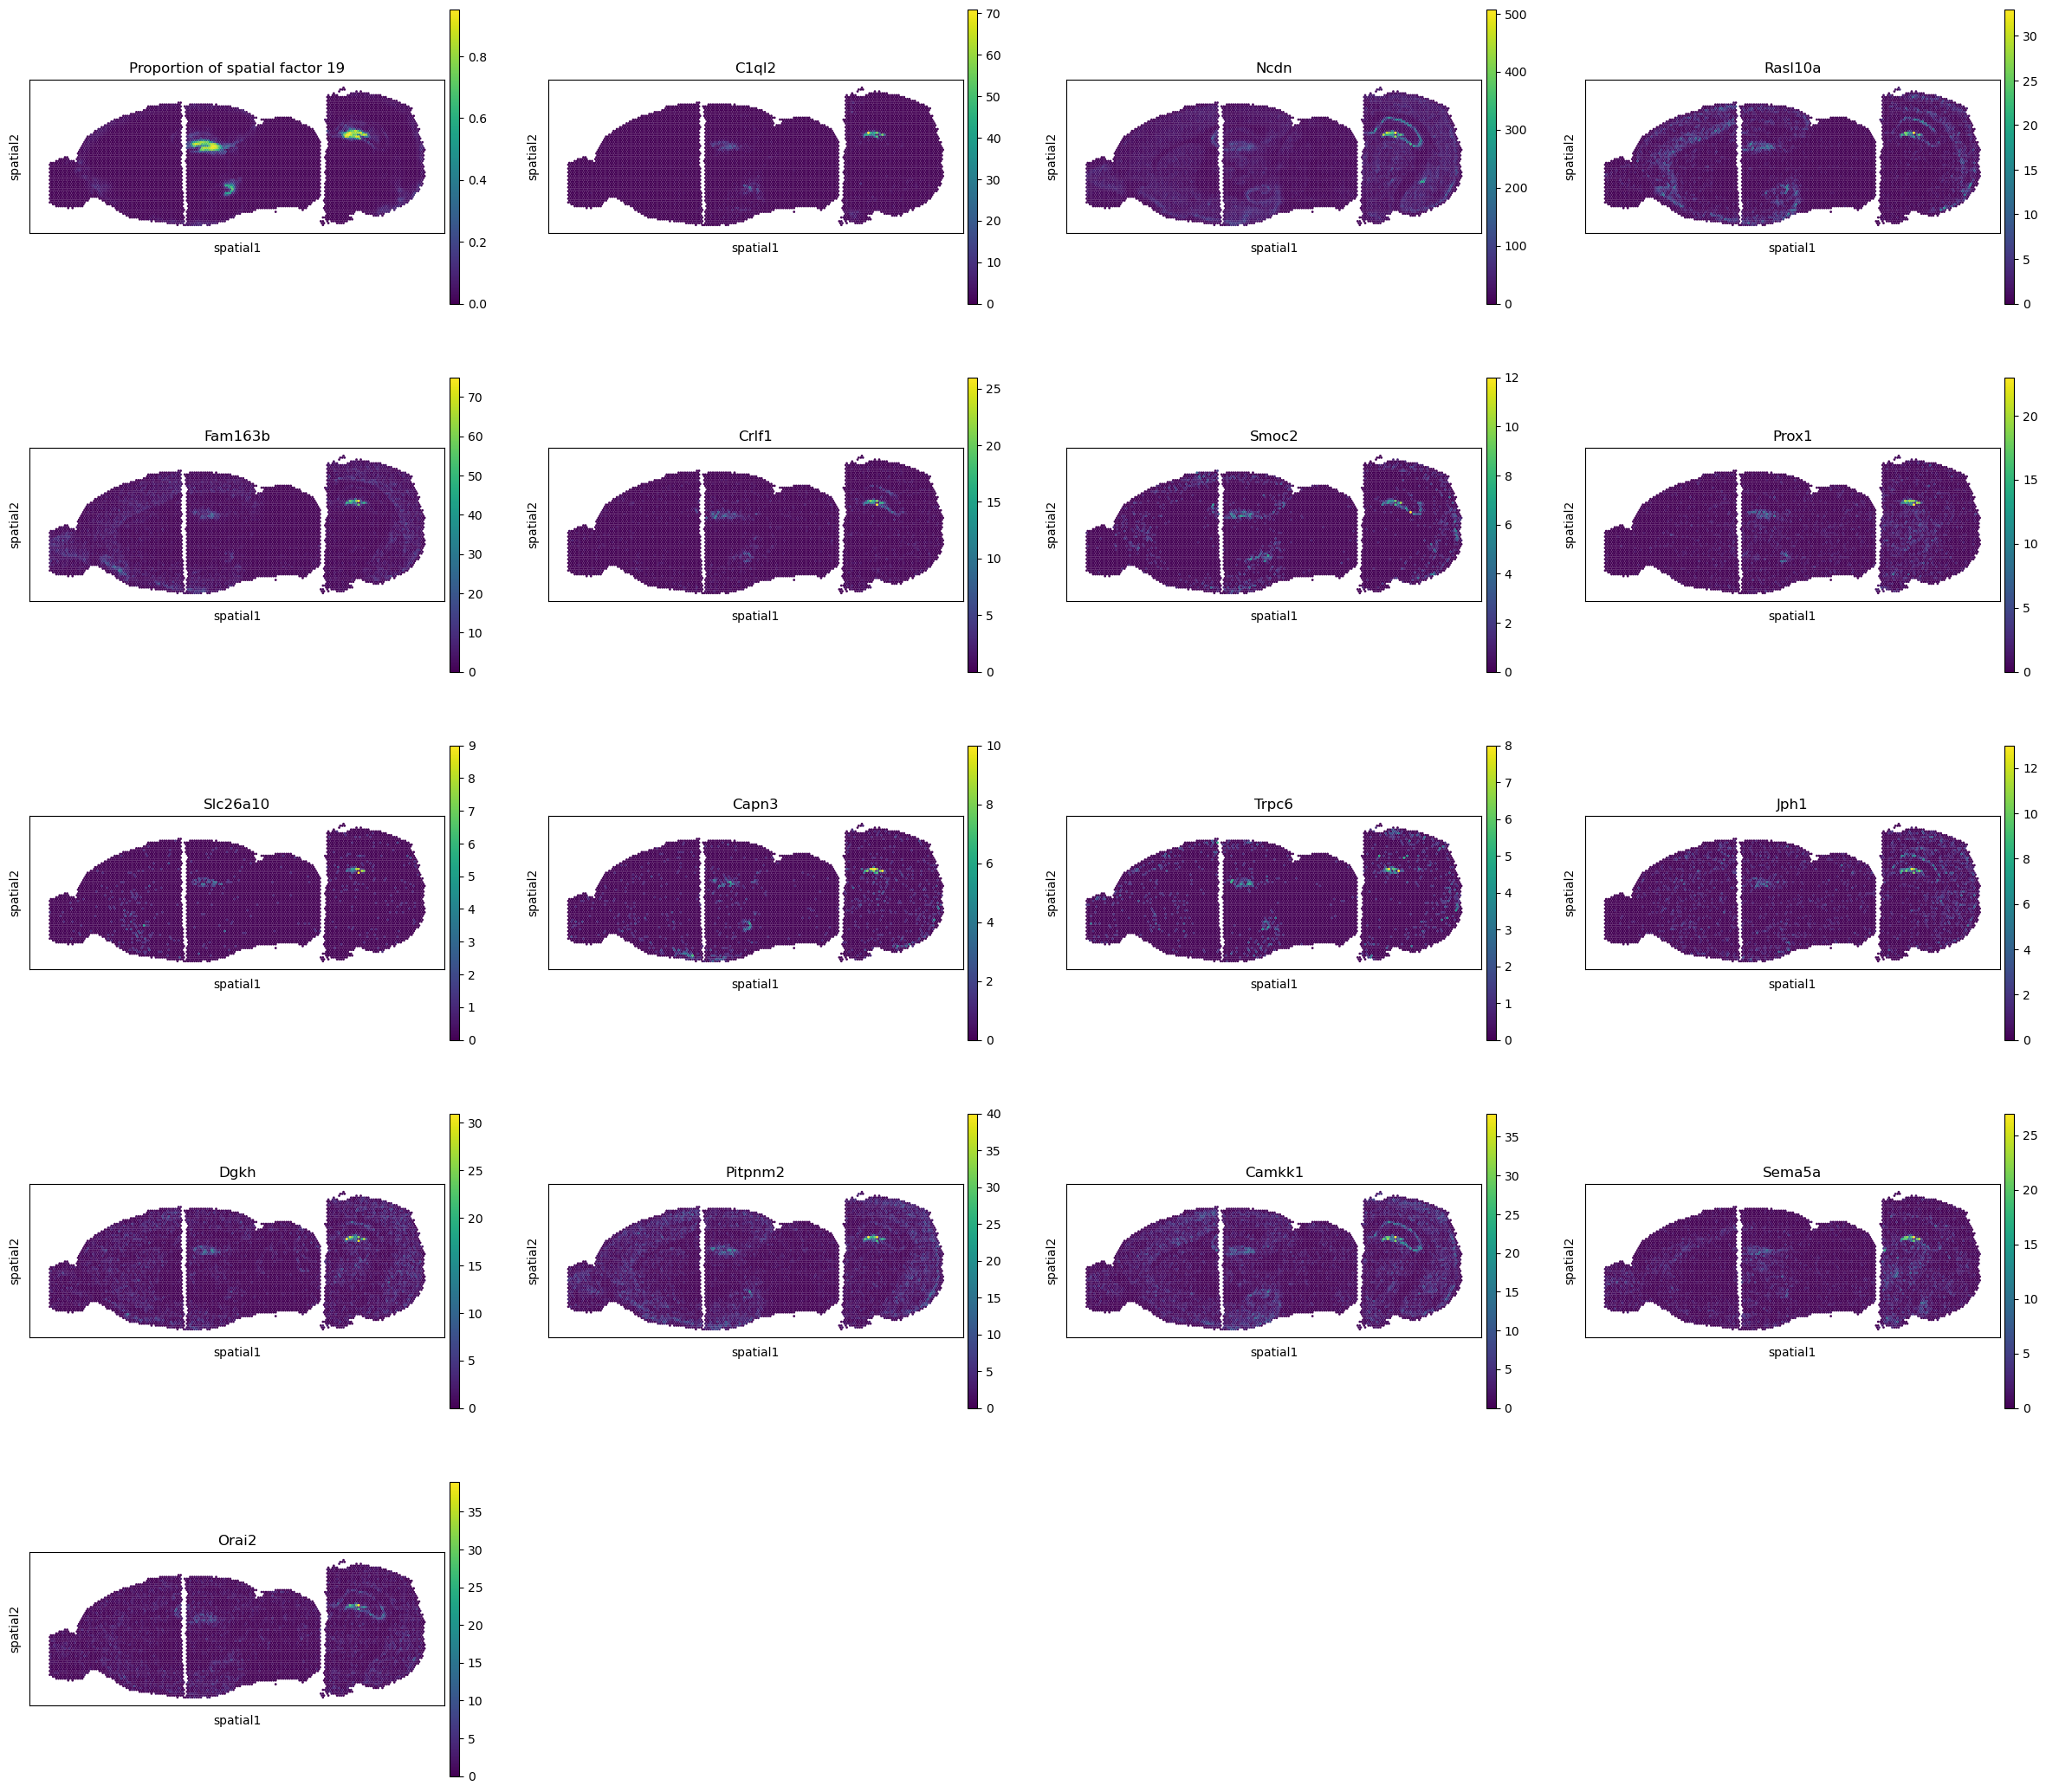

In [10]:
sc.pl.spatial(adata, color=["Proportion of spatial factor 19"] + marker_ours_18, spot_size=150.)

In [11]:
factor_id = 38

factor_profile = np.array(basis_df.iloc[factor_id,:].values)
order = np.argsort(-factor_profile)

potential_marker = list(basis_df.columns[order[:50]])
marker_ours = []
for i in range(len(potential_marker)):
    id_1 = np.argsort(-basis_df[potential_marker[i]])[0]
    id_2 = np.argsort(-basis_df[potential_marker[i]])[1]
    val_1 = basis_df[potential_marker[i]][id_1]
    val_2 = basis_df[potential_marker[i]][id_2]
    if (id_1 == factor_id) & (val_1 >= (val_2*1.5)):
        marker_ours.append(potential_marker[i])

marker_ours_38 = marker_ours

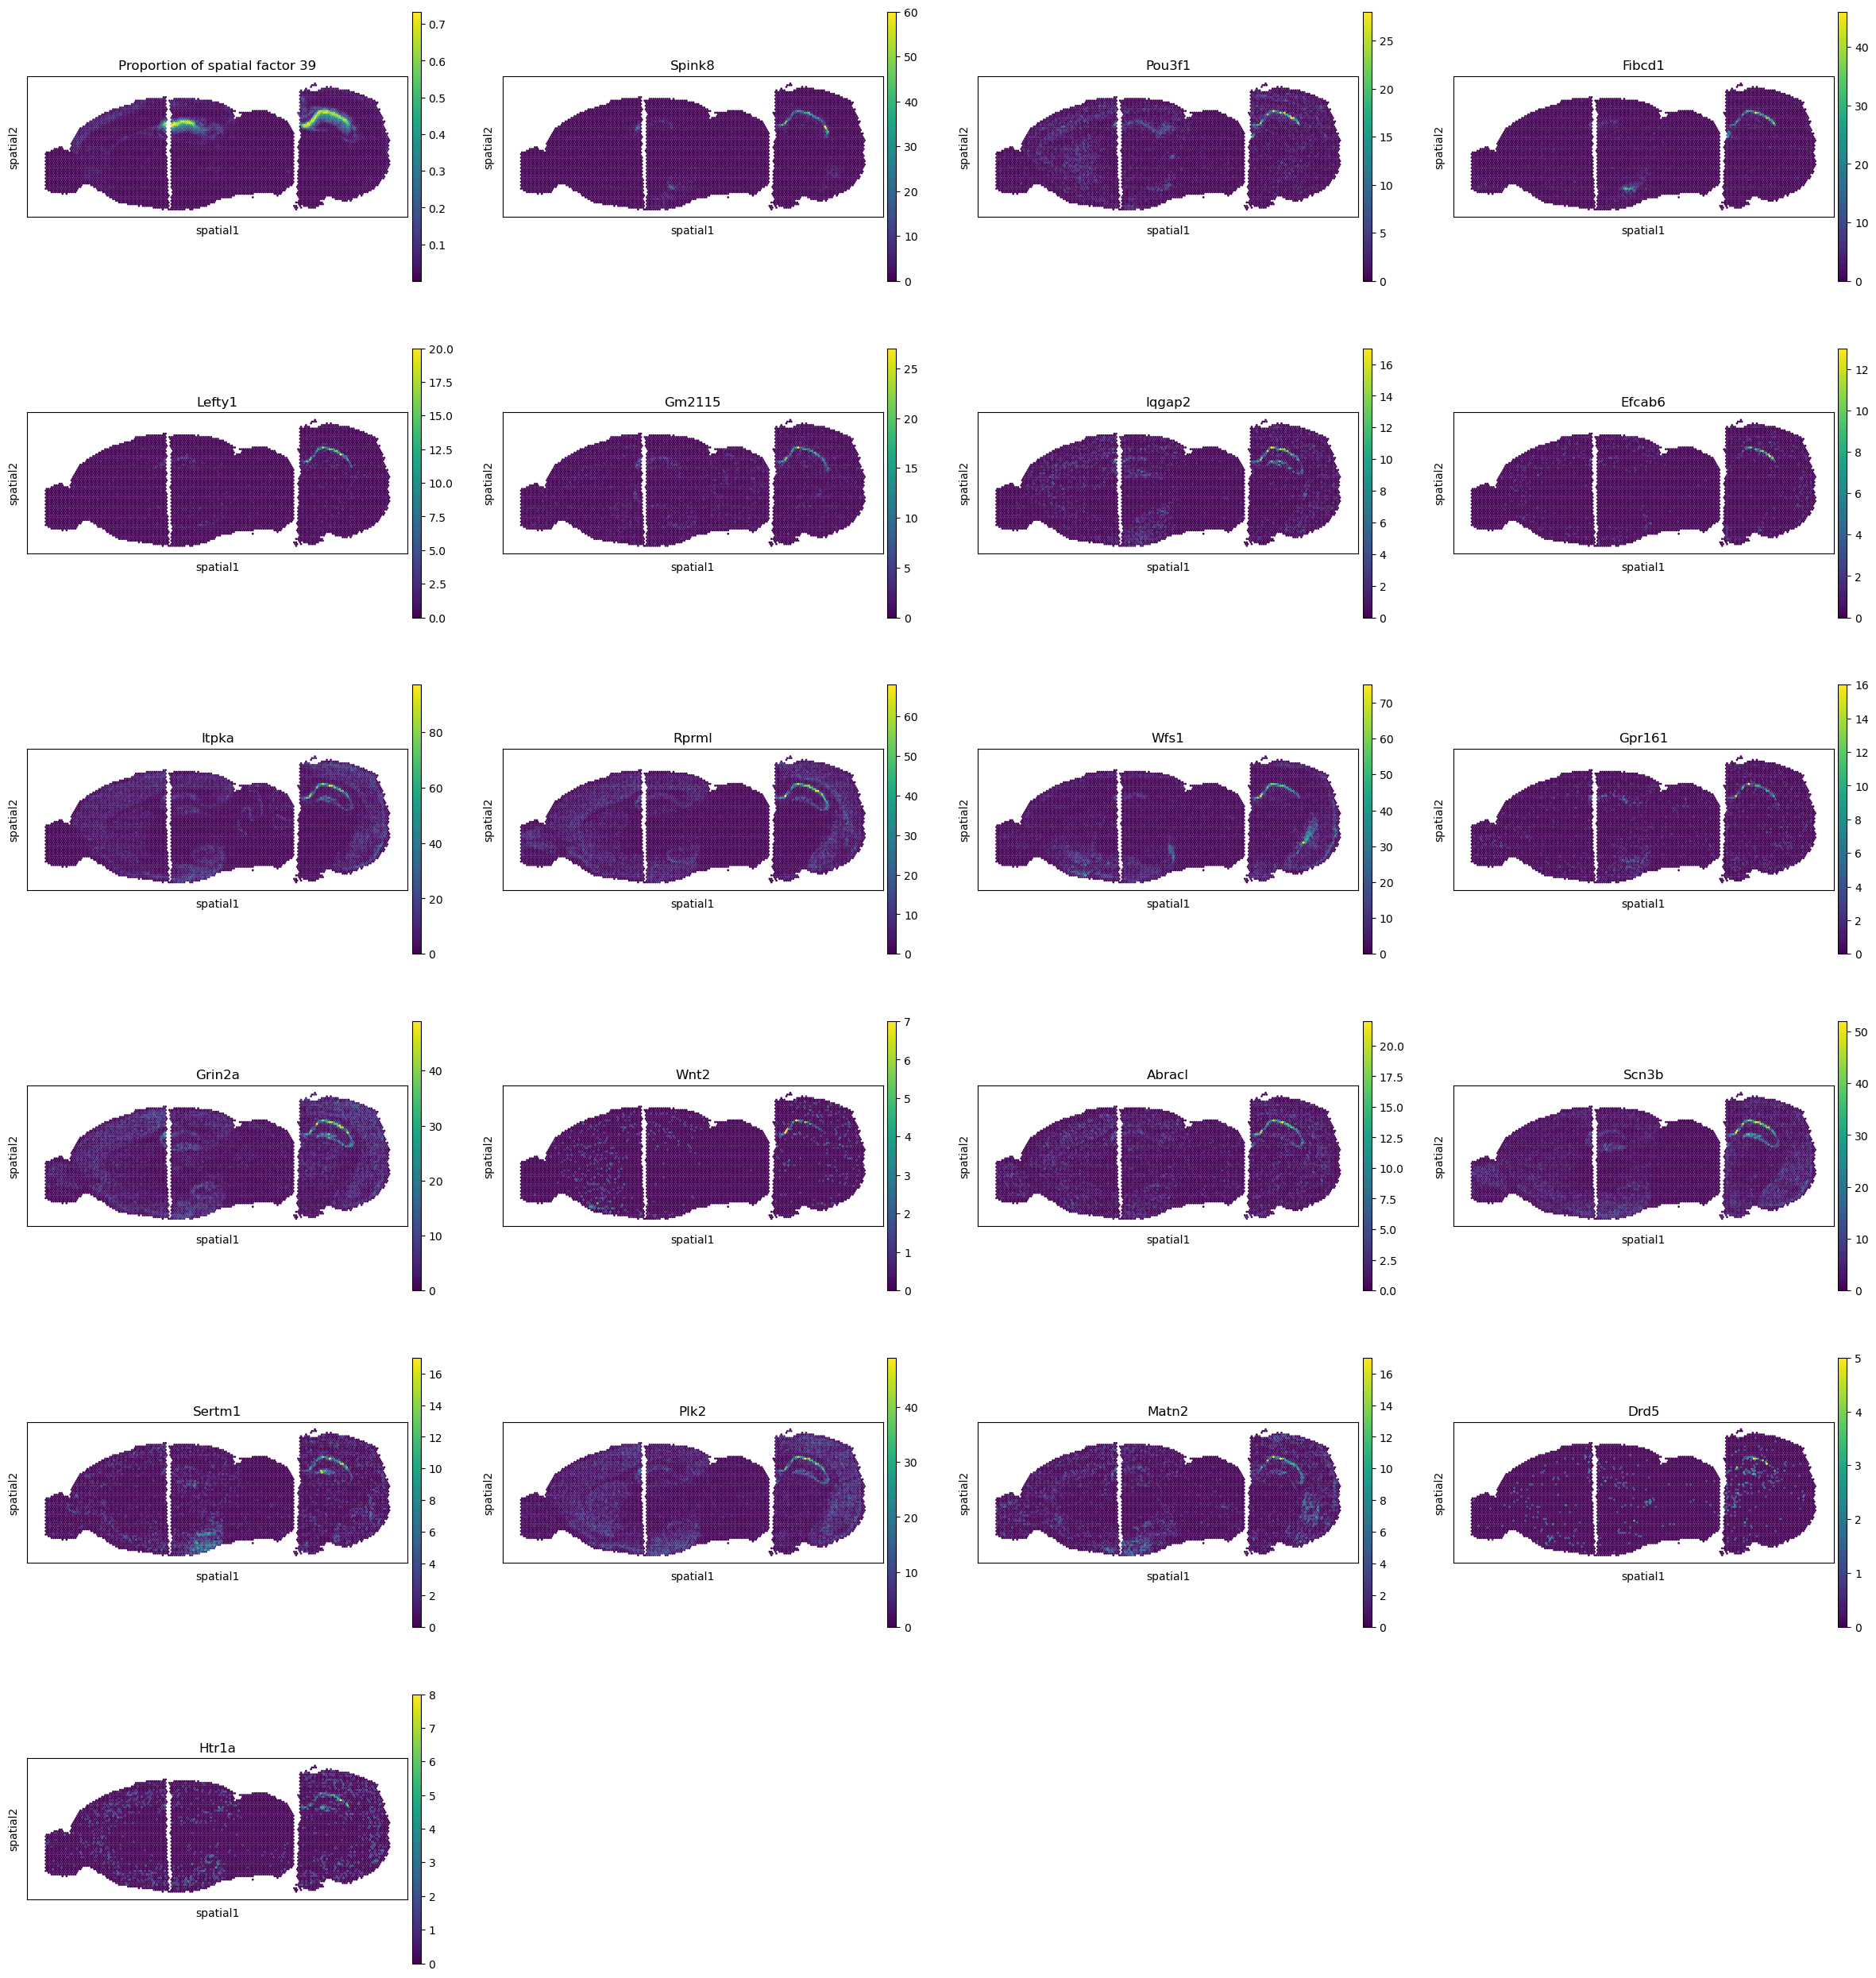

In [12]:
sc.pl.spatial(adata, color=["Proportion of spatial factor 39"] + marker_ours_38, spot_size=150.)

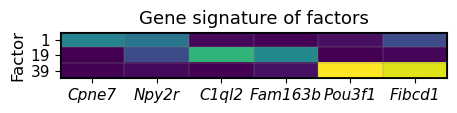

In [13]:
n_factors = 3
gene_set = ['Cpne7', 'Npy2r',
            'C1ql2', 'Fam163b',
            'Pou3f1', 'Fibcd1']
profile = basis_df.iloc[[0,18,38], :]
profile = profile[gene_set]

f = plt.figure(figsize=(5,0.6))
ax = f.add_subplot(111)
ax.set_ylabel('Factor', fontsize=12)
im = ax.imshow(profile, cmap='viridis', interpolation='nearest', aspect='auto')
plt.yticks(np.arange(n_factors), [str(i+1) for i in [0,18,38]], rotation=0, fontsize=11)
plt.xticks(np.arange(len(gene_set)), gene_set, rotation=0, fontsize=11, style="italic")
plt.title("Gene signature of factors", fontsize=13)
plt.vlines(x=np.arange(len(gene_set))-0.5, ymin=-0.5, ymax=n_factors-0.5, color="gray", linewidth=1.5, alpha=0.2)
plt.hlines(y=np.arange(n_factors)-0.5, xmin=-0.5, xmax=len(gene_set)-0.5, color="gray", linewidth=1.5, alpha=0.2)
plt.vlines(x=-0.5, ymin=-0.5, ymax=n_factors-0.5, color="k", linewidth=2, alpha=1)
plt.vlines(x=len(gene_set)-0.5, ymin=-0.5, ymax=n_factors-0.5, color="k", linewidth=2, alpha=1)
plt.hlines(y=-0.5, xmin=-0.5, xmax=len(gene_set)-0.5, color="k", linewidth=2, alpha=1)
plt.hlines(y=n_factors-0.5, xmin=-0.5, xmax=len(gene_set)-0.5, color="k", linewidth=2, alpha=1)
plt.show()

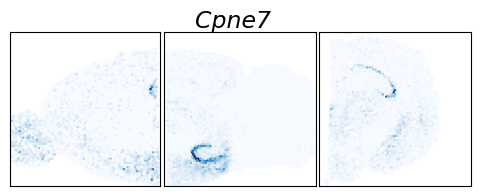

In [14]:
g = "Cpne7"

fig = plt.figure(figsize=(6,2))
size = 1.


# slice 1
ax0 = fig.add_subplot(1, 3, 1)
ax0.set_aspect('equal')
x_coor = adata_st1.obsm["spatial"][:, 0] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st1.obsm["spatial"][:, 1] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
ax0.scatter(x_coor, y_coor, s=size, rasterized=True, c=np.array(adata_st1[:,g].X.todense()).reshape(-1), cmap="Blues")
xmin, xmax = np.min(x_coor)-0, np.max(x_coor)+0
ymin, ymax = np.min(y_coor)-50, np.max(y_coor)
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymax, ymin)
ax0.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
# ax0.set_ylabel("INSPIRE", fontsize=12)


# slice 2
ax1 = fig.add_subplot(1, 3, 2)
ax1.set_aspect('equal')
x_coor = adata_st2.obsm["spatial"][:, 0] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st2.obsm["spatial"][:, 1] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
ax1.scatter(x_coor, y_coor, s=size, rasterized=True, c=np.array(adata_st2[:,g].X.todense()).reshape(-1), cmap="Blues")
xmin, xmax = np.min(x_coor)-0, np.max(x_coor)+0
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymax - y_adjust_2to1 * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef'], 
             ymin - y_adjust_2to1 * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef'])
ax1.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)


# slice 3
ax2 = fig.add_subplot(1, 3, 3)
x_coor = adata_st3.obsm["spatial"][:, 0] * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st3.obsm["spatial"][:, 1] * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef']
ax2.scatter(x_coor, y_coor, s=size, rasterized=True, c=np.array(adata_st3[:,g].X.todense()).reshape(-1), cmap="Blues")
ax2.set_aspect('equal')
ax2.set_xlim(xmin-0, xmax-0)
ax2.set_ylim(ymax - y_adjust_3to1 * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef'], 
             ymin - y_adjust_3to1 * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef'])
ax2.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)


fig.suptitle(g, fontsize=17, y=.99, style="italic")
fig.subplots_adjust(hspace=0.0, wspace=0.0)
plt.show()

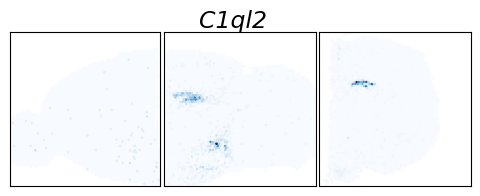

In [15]:
g = "C1ql2"

fig = plt.figure(figsize=(6,2))
size = 1.


# slice 1
ax0 = fig.add_subplot(1, 3, 1)
ax0.set_aspect('equal')
x_coor = adata_st1.obsm["spatial"][:, 0] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st1.obsm["spatial"][:, 1] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
ax0.scatter(x_coor, y_coor, s=size, rasterized=True, c=np.array(adata_st1[:,g].X.todense()).reshape(-1), cmap="Blues", vmax=10)
xmin, xmax = np.min(x_coor)-0, np.max(x_coor)+0
ymin, ymax = np.min(y_coor)-50, np.max(y_coor)
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymax, ymin)
ax0.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
# ax0.set_ylabel("INSPIRE", fontsize=12)


# slice 2
ax1 = fig.add_subplot(1, 3, 2)
ax1.set_aspect('equal')
x_coor = adata_st2.obsm["spatial"][:, 0] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st2.obsm["spatial"][:, 1] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
ax1.scatter(x_coor, y_coor, s=size, rasterized=True, c=np.array(adata_st2[:,g].X.todense()).reshape(-1), cmap="Blues")
xmin, xmax = np.min(x_coor)-0, np.max(x_coor)+0
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymax - y_adjust_2to1 * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef'], 
             ymin - y_adjust_2to1 * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef'])
ax1.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)


# slice 3
ax2 = fig.add_subplot(1, 3, 3)
x_coor = adata_st3.obsm["spatial"][:, 0] * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st3.obsm["spatial"][:, 1] * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef']
ax2.scatter(x_coor, y_coor, s=size, rasterized=True, c=np.array(adata_st3[:,g].X.todense()).reshape(-1), cmap="Blues")
ax2.set_aspect('equal')
ax2.set_xlim(xmin-0, xmax-0)
ax2.set_ylim(ymax - y_adjust_3to1 * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef'], 
             ymin - y_adjust_3to1 * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef'])
ax2.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)


fig.suptitle(g, fontsize=17, y=.99, style="italic")
fig.subplots_adjust(hspace=0.0, wspace=0.0)
plt.show()

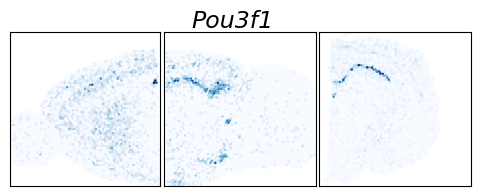

In [16]:
g = "Pou3f1"

fig = plt.figure(figsize=(6,2))
size = 1.


# slice 1
ax0 = fig.add_subplot(1, 3, 1)
ax0.set_aspect('equal')
x_coor = adata_st1.obsm["spatial"][:, 0] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st1.obsm["spatial"][:, 1] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
ax0.scatter(x_coor, y_coor, s=size, rasterized=True, c=np.array(adata_st1[:,g].X.todense()).reshape(-1), cmap="Blues")
xmin, xmax = np.min(x_coor)-0, np.max(x_coor)+0
ymin, ymax = np.min(y_coor)-50, np.max(y_coor)
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymax, ymin)
ax0.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
# ax0.set_ylabel("INSPIRE", fontsize=12)


# slice 2
ax1 = fig.add_subplot(1, 3, 2)
ax1.set_aspect('equal')
x_coor = adata_st2.obsm["spatial"][:, 0] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st2.obsm["spatial"][:, 1] * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef']
ax1.scatter(x_coor, y_coor, s=size, rasterized=True, c=np.array(adata_st2[:,g].X.todense()).reshape(-1), cmap="Blues")
xmin, xmax = np.min(x_coor)-0, np.max(x_coor)+0
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymax - y_adjust_2to1 * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef'], 
             ymin - y_adjust_2to1 * adata_st2.uns["spatial"][str(slice2_idx)]['scalefactors']['tissue_lowres_scalef'])
ax1.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)


# slice 3
ax2 = fig.add_subplot(1, 3, 3)
x_coor = adata_st3.obsm["spatial"][:, 0] * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata_st3.obsm["spatial"][:, 1] * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef']
im = ax2.scatter(x_coor, y_coor, s=size, rasterized=True, c=np.array(adata_st3[:,g].X.todense()).reshape(-1), cmap="Blues")
ax2.set_aspect('equal')
ax2.set_xlim(xmin-0, xmax-0)
ax2.set_ylim(ymax - y_adjust_3to1 * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef'], 
             ymin - y_adjust_3to1 * adata_st3.uns["spatial"][str(slice3_idx)]['scalefactors']['tissue_lowres_scalef'])
ax2.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)


fig.suptitle(g, fontsize=17, y=.99, style="italic")
fig.subplots_adjust(hspace=0.0, wspace=0.0)
plt.show()

### Utilize external scRNA-seq data to confirm the correspondence of these factors to neuron types in CA1, CA2/CA3, and DG

In [17]:
ref_path = "data/Visium_mouse_brain/scRef-STitch3D"
adata_ref = ad.read_h5ad(ref_path + "/all_cells_20200625.h5ad")
adata_ref.var.index = adata_ref.var["SYMBOL"].astype(str)
adata_ref.var_names_make_unique()
labels = pd.read_csv(ref_path + "/snRNA_annotation_astro_subtypes_refined59_20200823.csv", index_col=0)

labels = labels.reindex(index=adata_ref.obs_names)
adata_ref.obs[labels.columns] = labels
adata_ref = adata_ref[~adata_ref.obs['annotation_1'].isna(), :]
adata_ref.obs['celltype'] = adata_ref.obs['annotation_1']

celltype_list =['Ext_Hpc_CA1','Ext_Hpc_CA2','Ext_Hpc_CA3',
                'Ext_Hpc_DG1','Ext_Hpc_DG2']
idx_ct = [(ct in celltype_list) for ct in list(adata_ref.obs['celltype'])]
adata_ref = adata_ref[idx_ct, :]
adata_ref.obs["ct"] = adata_ref.obs["celltype"].values.astype(str)
adata_ref.obs["ct"][adata_ref.obs["ct"].values.astype(str) == "Ext_Hpc_CA1"] = "CA1"
adata_ref.obs["ct"][adata_ref.obs["ct"].values.astype(str) == "Ext_Hpc_CA2"] = "CA2/CA3"
adata_ref.obs["ct"][adata_ref.obs["ct"].values.astype(str) == "Ext_Hpc_CA3"] = "CA2/CA3"
adata_ref.obs["ct"][adata_ref.obs["ct"].values.astype(str) == "Ext_Hpc_DG1"] = "DG"
adata_ref.obs["ct"][adata_ref.obs["ct"].values.astype(str) == "Ext_Hpc_DG2"] = "DG"

shared_genes = adata_ref.var.index & basis_df.columns
adata_ref = adata_ref[:, shared_genes]

sc.pp.normalize_total(adata_ref, target_sum=1)
ct_list = sorted(list(set(adata_ref.obs["ct"])))
ct_basis = np.zeros((len(ct_list), adata_ref.shape[1]))
for i in range(len(ct_list)):
    ct = ct_list[i]
    ad_tmp = adata_ref[adata_ref.obs["ct"] == ct, :].copy()
    profile = np.mean(ad_tmp.X, axis=0)
    ct_basis[i, :] = profile
ct_basis_df = pd.DataFrame(data=ct_basis, index=ct_list, columns=adata_ref.var.index)

In [18]:
adata_ref = ad.read_h5ad(ref_path + "/all_cells_20200625.h5ad")
adata_ref.var.index = adata_ref.var["SYMBOL"].astype(str)
adata_ref.var_names_make_unique()
labels = pd.read_csv(ref_path + "/snRNA_annotation_astro_subtypes_refined59_20200823.csv", index_col=0)

labels = labels.reindex(index=adata_ref.obs_names)
adata_ref.obs[labels.columns] = labels
adata_ref = adata_ref[~adata_ref.obs['annotation_1'].isna(), :]
adata_ref.obs['celltype'] = adata_ref.obs['annotation_1']

celltype_list =['Ext_Hpc_CA1','Ext_Hpc_CA2','Ext_Hpc_CA3',
                'Ext_Hpc_DG1','Ext_Hpc_DG2']
idx_ct = [(ct in celltype_list) for ct in list(adata_ref.obs['celltype'])]
adata_ref = adata_ref[idx_ct, :]
adata_ref.obs["ct"] = adata_ref.obs["celltype"].values.astype(str)
adata_ref.obs["ct"][adata_ref.obs["ct"].values.astype(str) == "Ext_Hpc_CA1"] = "CA1"
adata_ref.obs["ct"][adata_ref.obs["ct"].values.astype(str) == "Ext_Hpc_CA2"] = "CA2/CA3"
adata_ref.obs["ct"][adata_ref.obs["ct"].values.astype(str) == "Ext_Hpc_CA3"] = "CA2/CA3"
adata_ref.obs["ct"][adata_ref.obs["ct"].values.astype(str) == "Ext_Hpc_DG1"] = "DG"
adata_ref.obs["ct"][adata_ref.obs["ct"].values.astype(str) == "Ext_Hpc_DG2"] = "DG"

shared_genes = adata_ref.var.index & basis_df.columns
adata_ref = adata_ref[:, shared_genes]

In [19]:
sc.pp.normalize_total(adata_ref, target_sum=1e4)
sc.pp.log1p(adata_ref)
adata_ref.raw = adata_ref
sc.pp.scale(adata_ref, max_value=10)
sc.tl.rank_genes_groups(adata_ref, groupby="ct", method="t-test", key_added="ttest")

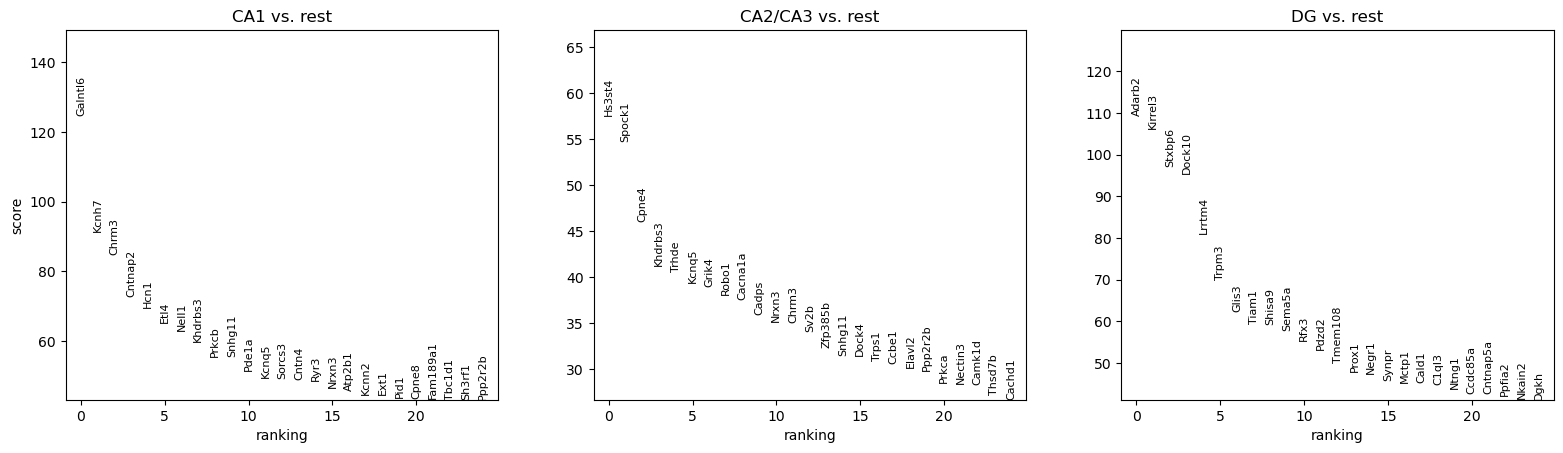

In [20]:
sc.pl.rank_genes_groups(adata_ref, n_genes=25, sharey=False, key = "ttest")

In [21]:
result = adata_ref.uns['ttest']
groups = result['names'].dtype.names
df_genes = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(200)

In [22]:
ct = "CA1"

potential_marker = list(df_genes[ct+"_n"])[:10]
marker = []
for i in range(len(potential_marker)):
    id_1 = np.argsort(-ct_basis_df[potential_marker[i]])[0]
    id_2 = np.argsort(-ct_basis_df[potential_marker[i]])[1]
    ct_1 = ct_basis_df.index[id_1]
    val_1 = ct_basis_df[potential_marker[i]][id_1]
    val_2 = ct_basis_df[potential_marker[i]][id_2]
    if (ct_1 == ct) & (val_1 >= (val_2*1.5)):
        marker.append(potential_marker[i])
marker_astro = marker

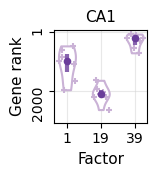

In [23]:
factor_list = [0,18,38]
rank_list = []
for t in factor_list:
    factor_profile = np.array(basis_df.iloc[t, :])
    order = np.argsort(-factor_profile)
    order_gene = basis_df.columns[order]

    rank = []
    for g in marker:
        rk = np.where(order_gene == g)[0][0]
        rank.append(rk)

    rank_list.append(rank)

c_hex = "#CAB2D6"
fig = plt.figure(figsize=(1.2,1.2))
ax = fig.add_subplot(111)
parts = ax.violinplot(
        rank_list, showmeans=False, showmedians=False,
        showextrema=False, widths=0.5)
plt.ylim(basis_df.shape[1]+50,-50)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor('white')
    pc.set_edgecolor(c_hex)
    pc.set_alpha(1.0)
    pc.set_linewidth(1.5)
for i in range(len(rank_list)):
    ax.scatter(np.random.uniform(i+0.75,i+1.25,len(rank_list[i])), rank_list[i], c=c_hex, marker='+', s=15)
quartile1, medians, quartile3 = np.percentile(rank_list, [25, 50, 75], axis=1)
inds = np.arange(1, len(medians) + 1)
for i, pc in enumerate(parts['bodies']):
    ax.scatter(inds[i], medians[i], marker='o', color="#6A3D9A", s=20, zorder=3)
    ax.vlines(inds[i], quartile1[i], quartile3[i], color="#6A3D9A", linestyle='-', lw=3, alpha=0.8)

ax.grid(color="lightgray", alpha=0.5)
ax.set_axisbelow(True)
plt.xticks(np.arange(len(factor_list))+1, [str(i+1) for i in factor_list], rotation=0, fontsize=10)
plt.yticks([1,2000], [1,2000], rotation=90, fontsize=10)
plt.ylabel("Gene rank", fontsize=11)
plt.xlabel("Factor", fontsize=11)
plt.title("CA1", fontsize=11)
plt.show()

In [24]:
ct = "CA2/CA3"

potential_marker = list(df_genes[ct+"_n"])[:10]
marker = []
for i in range(len(potential_marker)):
    id_1 = np.argsort(-ct_basis_df[potential_marker[i]])[0]
    id_2 = np.argsort(-ct_basis_df[potential_marker[i]])[1]
    ct_1 = ct_basis_df.index[id_1]
    val_1 = ct_basis_df[potential_marker[i]][id_1]
    val_2 = ct_basis_df[potential_marker[i]][id_2]
    if (ct_1 == ct) & (val_1 >= (val_2*1.5)):
        marker.append(potential_marker[i])
marker_astro = marker

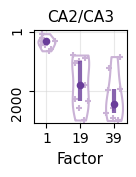

In [25]:
factor_list = [0,18,38]
rank_list = []
for t in factor_list:
    factor_profile = np.array(basis_df.iloc[t, :])
    order = np.argsort(-factor_profile)
    order_gene = basis_df.columns[order]

    rank = []
    for g in marker:
        rk = np.where(order_gene == g)[0][0]
        rank.append(rk)

    rank_list.append(rank)

c_hex = "#CAB2D6"
fig = plt.figure(figsize=(1.2,1.2))
ax = fig.add_subplot(111)
parts = ax.violinplot(
        rank_list, showmeans=False, showmedians=False,
        showextrema=False, widths=0.5)
plt.ylim(basis_df.shape[1]+50,-50)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor('white')
    pc.set_edgecolor(c_hex)
    pc.set_alpha(1.0)
    pc.set_linewidth(1.5)
for i in range(len(rank_list)):
    ax.scatter(np.random.uniform(i+0.75,i+1.25,len(rank_list[i])), rank_list[i], c=c_hex, marker='+', s=15)
quartile1, medians, quartile3 = np.percentile(rank_list, [25, 50, 75], axis=1)
inds = np.arange(1, len(medians) + 1)
for i, pc in enumerate(parts['bodies']):
    ax.scatter(inds[i], medians[i], marker='o', color="#6A3D9A", s=20, zorder=3)
    ax.vlines(inds[i], quartile1[i], quartile3[i], color="#6A3D9A", linestyle='-', lw=3, alpha=0.8)

ax.grid(color="lightgray", alpha=0.5)
ax.set_axisbelow(True)
plt.xticks(np.arange(len(factor_list))+1, [str(i+1) for i in factor_list], rotation=0, fontsize=10)
plt.yticks([1,2000], [1,2000], rotation=90, fontsize=10)
plt.xlabel("Factor", fontsize=11)
plt.title("CA2/CA3", fontsize=11)
plt.show()

In [26]:
ct = "DG"

potential_marker = list(df_genes[ct+"_n"])[:10]
marker = []
for i in range(len(potential_marker)):
    id_1 = np.argsort(-ct_basis_df[potential_marker[i]])[0]
    id_2 = np.argsort(-ct_basis_df[potential_marker[i]])[1]
    ct_1 = ct_basis_df.index[id_1]
    val_1 = ct_basis_df[potential_marker[i]][id_1]
    val_2 = ct_basis_df[potential_marker[i]][id_2]
    if (ct_1 == ct) & (val_1 >= (val_2*1.5)):
        marker.append(potential_marker[i])
marker_astro = marker

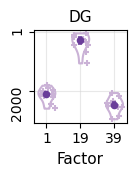

In [27]:
factor_list = [0,18,38]
rank_list = []
for t in factor_list:
    factor_profile = np.array(basis_df.iloc[t, :])
    order = np.argsort(-factor_profile)
    order_gene = basis_df.columns[order]

    rank = []
    for g in marker:
        rk = np.where(order_gene == g)[0][0]
        rank.append(rk)

    rank_list.append(rank)

c_hex = "#CAB2D6"
fig = plt.figure(figsize=(1.2,1.2))
ax = fig.add_subplot(111)
parts = ax.violinplot(
        rank_list, showmeans=False, showmedians=False,
        showextrema=False, widths=0.5)
plt.ylim(basis_df.shape[1]+50,-50)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor('white')
    pc.set_edgecolor(c_hex)
    pc.set_alpha(1.0)
    pc.set_linewidth(1.5)
for i in range(len(rank_list)):
    ax.scatter(np.random.uniform(i+0.75,i+1.25,len(rank_list[i])), rank_list[i], c=c_hex, marker='+', s=15)
quartile1, medians, quartile3 = np.percentile(rank_list, [25, 50, 75], axis=1)
inds = np.arange(1, len(medians) + 1)
for i, pc in enumerate(parts['bodies']):
    ax.scatter(inds[i], medians[i], marker='o', color="#6A3D9A", s=20, zorder=3)
    ax.vlines(inds[i], quartile1[i], quartile3[i], color="#6A3D9A", linestyle='-', lw=3, alpha=0.8)

ax.grid(color="lightgray", alpha=0.5)
ax.set_axisbelow(True)
plt.xticks(np.arange(len(factor_list))+1, [str(i+1) for i in factor_list], rotation=0, fontsize=10)
plt.yticks([1,2000], [1,2000], rotation=90, fontsize=10)
plt.xlabel("Factor", fontsize=11)
plt.title("DG", fontsize=11)
plt.show()

In [28]:
adata_ref = ad.read_h5ad(ref_path + "/all_cells_20200625.h5ad")
adata_ref.var.index = adata_ref.var["SYMBOL"].astype(str)
adata_ref.var_names_make_unique()
labels = pd.read_csv(ref_path + "/snRNA_annotation_astro_subtypes_refined59_20200823.csv", index_col=0)

labels = labels.reindex(index=adata_ref.obs_names)
adata_ref.obs[labels.columns] = labels
adata_ref = adata_ref[~adata_ref.obs['annotation_1'].isna(), :]
adata_ref.obs['celltype'] = adata_ref.obs['annotation_1']

celltype_list =['Ext_Hpc_CA1','Ext_Hpc_CA2','Ext_Hpc_CA3',
                'Ext_Hpc_DG1','Ext_Hpc_DG2']
idx_ct = [(ct in celltype_list) for ct in list(adata_ref.obs['celltype'])]
adata_ref = adata_ref[idx_ct, :]
adata_ref.obs["ct"] = adata_ref.obs["celltype"].values.astype(str)
adata_ref.obs["ct"][adata_ref.obs["ct"].values.astype(str) == "Ext_Hpc_CA1"] = "CA1"
adata_ref.obs["ct"][adata_ref.obs["ct"].values.astype(str) == "Ext_Hpc_CA2"] = "CA2/CA3"
adata_ref.obs["ct"][adata_ref.obs["ct"].values.astype(str) == "Ext_Hpc_CA3"] = "CA2/CA3"
adata_ref.obs["ct"][adata_ref.obs["ct"].values.astype(str) == "Ext_Hpc_DG1"] = "DG"
adata_ref.obs["ct"][adata_ref.obs["ct"].values.astype(str) == "Ext_Hpc_DG2"] = "DG"

shared_genes = adata_ref.var.index & basis_df.columns
adata_ref = adata_ref[:, shared_genes]

sc.pp.normalize_total(adata_ref, target_sum=1e4)
sc.pp.log1p(adata_ref)
sc.pp.scale(adata_ref, max_value=10)

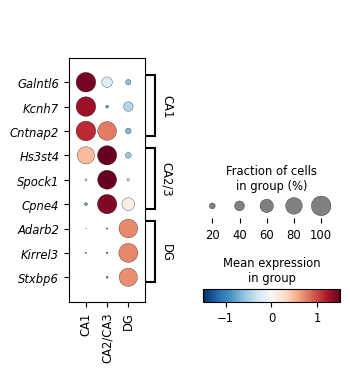

In [29]:
marker_profile = {}
marker_profile["CA1"] = ['Galntl6', 'Kcnh7', 'Cntnap2', 'Hcn1', 'Etl4', 'Nell1', 'Prkcb'][:3]
marker_profile["CA2/3"] = ['Hs3st4', 'Spock1', 'Cpne4', 'Trhde', 'Kcnq5', 'Grik4', 'Robo1', 'Cacna1a', 'Cadps'][:3]
marker_profile["DG"] = ['Adarb2', 'Kirrel3', 'Stxbp6', 'Dock10', 'Lrrtm4', 'Trpm3', 'Glis3', 'Tiam1', 'Shisa9', 'Sema5a'][:3]

fig, ax = plt.subplots(figsize=(3.5, 3.8))
mt = sc.pl.dotplot(adata_ref, marker_profile, 'ct', dendrogram=False, cmap='RdBu_r', vmin=-1.5, vmax=1.5, ax=ax,
                   show=False, swap_axes=True)
ax_main = mt['mainplot_ax']
for l in ax_main.get_yticklabels():
    l.set_style('italic')
plt.show()